### CNN : Convolution neural network : 합성곱 신경망
#### - 주로 이미지 분류에 사용
#### - 딥러닝의 가장 대표적인 방법
#### - 지금까지 진행된 신경망은 인공신경망의 핵심 모델

#### - 인공신경망의 핵심 계층 사이 사이에 새롭게 나온 신경망(CNN)계층이 추가되는 형태로 사용됨

#### - 인공신경망은 1차원 형태의 데이터에서 특징을 찾았다면
#### - CNN은 차원을 그대로 적용하여 특징을 찾는 방법을 적용한 알고리즘
#### - 사람이 개입하지 않음(CNN 알고리즘이 알아서 처리)

#### - 1차원의 경우 공간정보 유실 발생, 이를 극복한것이 CNN(형태 그대로)

#### [ CNN과 인공신경망 모델의 차이점 ]
#### - 각 레이어의 입출력 데이터의 형상을 그대로 유지
#### - 이미지의 공간 정보를 유지하면서 인접 이미지와의 특징을 효과적으로 인식할 수 있음
#### - 복수의 " 필터"를 사용하여 이미지의 특징을 추출하고 학습함
#### - 인공신경망괴 비교했을 때 사용되는 파라미터(데이터건수)가 작음
#### - 기존 인공신경망 모델을 향상시킨 모델

### 패션이미지 데이터 불러오기(MNIST)

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


####  CNN에서 사용되는 데이터 차원
#### - 훈련을 위해서는 입력데이터는 4차원으로 변환 후 정규화를 해야 함
#### - 합성곱 연산은 2차원 연산이 일어나며, 이를 위해 4차원(축, 이미지높이, 이미지너비, 컬러태널)로 변환 필요

#### [ 컬러채널 ]
#### - 컬러색상 : 3채널(R, G B) 3개 사용
#### - 흑백색상 : 1채널 1개 사용
---

#### 4차원으로 변환하기/ 정규화

In [4]:
train_scaled = train_input.reshape(-1,28,28,1) /255.0  # (행, 높이, 너비, 색상채널 - 흑백이므로 1)
train_scaled.shape

(60000, 28, 28, 1)

In [5]:
from sklearn.model_selection import train_test_split
train_scaled, val_sclaed, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

train_scaled.shape, val_sclaed.shape, train_target.shape, val_target.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

#### 합성곱신경망 모델 생성
#### - 

In [6]:
model = keras.Sequential()

#### CNN 계층 추가
#### - kernel_size : 3 * 3(CNN이 알아서 3행 3열의 임의의 값이 설정된 픽셀값과 원래 데이터를 연산)
#### - filters : 커널사이즈 크기로 추출할 갯수, 많을 수록 많은 특징을 추출할 수 있지만 속도가 느려짐
#### - padding : 경계 처리 방법을 정의함, 
#### : same : 출력 이미지 사이즈가 입력 이미지사이즈와 동일하게 처리, 이미지 사이즈가 같지않을 경우 빈 공간에는 빈값을 넣음
#### : valid : 입력 이미지 사이즈보다 작아짐
#### - stride : 필터가 특징을 추출하는 과정에서 커널을 몇칸씩 옆으로 이동할 것인지 지정하는 속성(기본값 1)
----
### 최초 입력계층에만 Input_shape사용

In [7]:
model.add(keras.layers.Conv2D(filters=32,
                             kernel_size=3,
                             activation='relu',
                             padding='same',
                             input_shape=(28,28,1)))

model

#### 은닉계층 추가하기
#### - 최대 폴링 레이어(MaxPooling2D()) 계층 추가하기
#### - 훈련에 사용되지 않으며 데이터 추출을 위한 전처리 계층임
#### - Conv2D 계층과 함께 주로 사용
#### - 매우 많이 사용되는 계층
#### - keras.layers.MaxPool2D(pool_size =(2,2), strides=(2,2))
#### : pool_size -  연산 범위를 의미하며 해당 범위내의 가장 큰 수만을 추출, 픽셀에서 숫자값이 클수록 색상이 진함(특징이 뚜렷)
#### : strides - 연산의 범위만큼 오른쪽 아래로 지정된 값(기본값 1씩)만큼 이동
---
#### 아래 2라는 값 = pool_size(2,2)와 같음

In [8]:
model.add(keras.layers.MaxPool2D(2))

In [9]:
# 다시 CNN 계층 추가
model.add(keras.layers.Conv2D(filters=64,
                             kernel_size=(3,3),
                             activation='relu',
                             padding='same',
                             strides=1))

model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


### CNN계층을 만드는 순서
#### - 원본 그대로의 값에서 특징을 찾아내는 것이 목적이기에
#### - 시작 계층부터 보통 시작을을 많이 함
#### - CNN 계층부분이 끝난 후에는 기존과 동일하게 인공신경망 모델을 준수
#### - 1차원으로 변환부터 진행하여 출력층까지 생성하여 완료
---

### 인공신경망 계층 추가
#### 1차원 전처리 계층 추가

In [11]:
model.add(keras.layers.Flatten())

#### 은닉층 추가

In [12]:
model.add(keras.layers.Dense(100, activation='relu'))

#### 성능을 높이기 위한 Dropout 전처리계층 추가

In [13]:
model.add(keras.layers.Dropout(0.4))

#### 출력 계층 추가 (최종 분류 결과값 : 0~9, softmax사용)

In [14]:
model.add(keras.layers.Dense(10, activation='softmax'))

### parameter 갯수 계산
#### - 최초 입력계층 Conv2D : 커널사이즈 * 컬러채널수 * Strides * 편향(무조건1) * 필터수
#### - 두번째 입력계층 Conv2D : 커널사이즈 * 입력데이터수 * Strides * 편향(무조건1) * 필터수
#### : 입력데이터수는 이전 계층에서 출력한 갯수(필터 : 32)

#### - flatten : 14 * 14 * 64
#### - Dense : 입력데이터 갯수 * 출력갯수 + 출력갯수


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

### 인공신경망 계층 구조를 시각화하기
#### - show_shapes : 층의 정보를 상세히 표현
#### - to_file : 이미지 파일 저장

#### 이미지가 안 나오는 경우 conda install -c conda-forge pydot graphviz 설치

In [16]:
from tensorflow.keras.utils import plot_model

In [17]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
plot_model(model, show_shapes=True,
          to_file='./image/cnn_model.png',dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### 모델 컴파일 하기


In [19]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

###  Callback 함수지정

In [21]:
check_cb = keras.callbacks.ModelCheckpoint('./model/best_cnn_model.h5')
early_cb= keras.callbacks.EarlyStopping(patience=2,
                                        restore_best_weights=True)

### 훈련하기

In [22]:
history = model.fit(train_scaled, train_target,
                   epochs=20,
                   validation_data=(val_sclaed,val_target),
                   callbacks=[check_cb, early_cb])

Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4749 - accuracy: 0.8309 - val_loss: 0.3163 - val_accuracy: 0.8833
Epoch 2/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.3179 - accuracy: 0.8857 - val_loss: 0.2575 - val_accuracy: 0.9025
Epoch 3/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2661 - accuracy: 0.9027 - val_loss: 0.2419 - val_accuracy: 0.9090
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2299 - accuracy: 0.9150 - val_loss: 0.2301 - val_accuracy: 0.9157
Epoch 5/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1987 - accuracy: 0.9266 - val_loss: 0.2185 - val_accuracy: 0.9194
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1741 - accuracy: 0.9348 - val_loss: 0.2155 - val_accuracy: 0.9222
Epoch 7/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1544 - accuracy: 0.9422 - val_loss: 0.2207 -

### 성능 시각화

In [24]:
import matplotlib.pyplot as plt

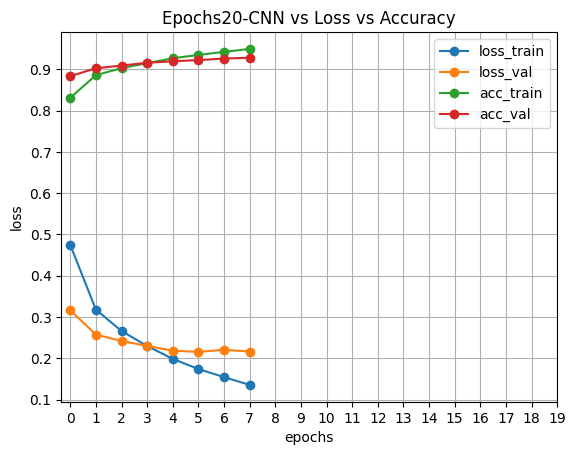

In [25]:
plt.plot(history.history["loss"], marker='o')
plt.plot(history.history["val_loss"], marker='o')
plt.plot(history.history["accuracy"], marker='o')
plt.plot(history.history["val_accuracy"], marker='o')

plt.title("Epochs20-CNN vs Loss vs Accuracy")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['loss_train','loss_val','acc_train','acc_val'])

### x축의 값 설정하기
xList = [i for i in range(20)]
plt.xticks(xList)

plt.grid()

# 그래프를 이미지로 저장하기
plt.savefig('./image/01_CNN_Total.png',dpi=300)
plt.show()

### 정확도 확인하기

In [26]:
model.evaluate(val_sclaed,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2155 - accuracy: 0.9222


[0.21550489962100983, 0.922166645526886]

### 이미지 하나만 분류예측하기



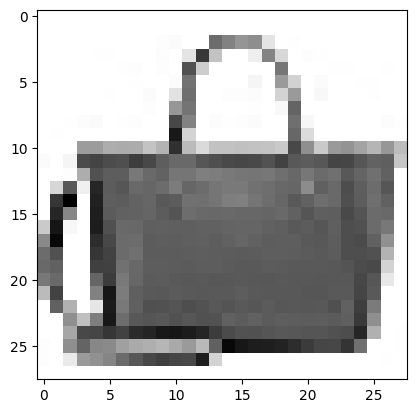

In [27]:
plt.imshow(val_sclaed[0].reshape(28,28),cmap='gray_r')

In [30]:
pred = model.predict(val_sclaed[0:1])

In [31]:
pred

array([[1.5351007e-16, 6.8417362e-24, 1.3623428e-19, 1.6773740e-18,
        5.3760038e-16, 1.3185890e-14, 7.8646152e-16, 2.7026585e-15,
        1.0000000e+00, 5.7280550e-16]], dtype=float32)

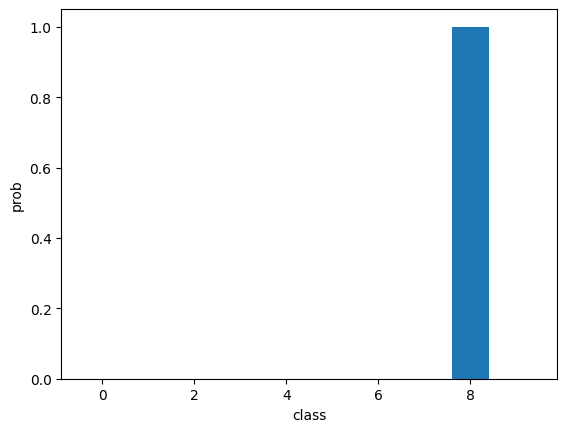

In [34]:
plt.bar(range(0,10), pred[0])
plt.xlabel("class")
plt.ylabel("prob")
plt.show()

In [37]:
pred.shape

(1, 10)

###  타겟값 순서
#### ['티셔츠', '바지', '스웨터', '드레스', '코트',' 샌달','셔츠', '스니커즈', '가방', '앵클 부츠']

In [40]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',' 샌달','셔츠', '스니커즈', '가방', '앵클 부츠']

In [41]:
import numpy as np
print(np.argmax(pred))
print(classes[np.argmax(pred)])

8
가방


### Test데이터를 이용해 최종 예측해보기
#### Test 데이터를 4차원으로 변환

In [42]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

### Test데이터 예측하기

In [55]:
test_preds = model.predict(test_scaled)

### Test데이터 예측결과 확인
#### 확인을 위한 프로그램
#### 정답/오답 확인변수



In [57]:
test_preds[0:5]

array([[4.9381482e-10, 1.0951505e-15, 7.7358675e-10, 3.9651574e-11,
        1.0613689e-12, 7.9018809e-09, 2.9610467e-09, 9.4943181e-07,
        8.6362195e-11, 9.9999905e-01],
       [2.7028713e-07, 1.5593720e-16, 9.9998593e-01, 6.9793282e-11,
        6.7472331e-07, 1.7238934e-19, 1.3145513e-05, 5.4045162e-21,
        7.6097098e-13, 5.6482744e-17],
       [9.3342088e-12, 1.0000000e+00, 1.6552665e-14, 4.3108889e-10,
        1.3619943e-12, 3.5574325e-15, 2.4065830e-12, 1.1576905e-15,
        9.9023806e-13, 8.8402703e-15],
       [7.6362934e-13, 1.0000000e+00, 1.2277848e-15, 4.6117811e-11,
        5.4151388e-13, 1.0122383e-17, 1.3214051e-12, 6.6423728e-18,
        6.7170065e-14, 2.2740593e-17],
       [5.0913845e-03, 3.8991601e-09, 1.0402562e-04, 6.6041400e-07,
        3.4626527e-04, 2.2368754e-09, 9.9445760e-01, 5.6846656e-11,
        4.6330966e-09, 2.1556055e-09]], dtype=float32)

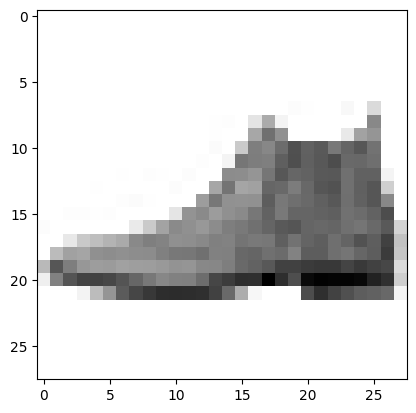

Count[0] / 예측:9(앵클 부츠) | 정답:9


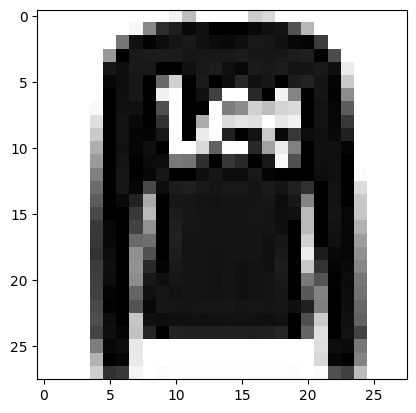

Count[1] / 예측:2(스웨터) | 정답:2


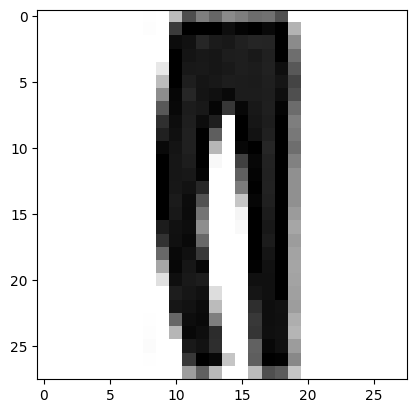

Count[2] / 예측:1(바지) | 정답:1


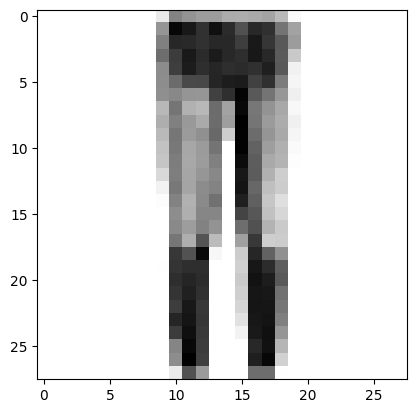

Count[3] / 예측:1(바지) | 정답:1


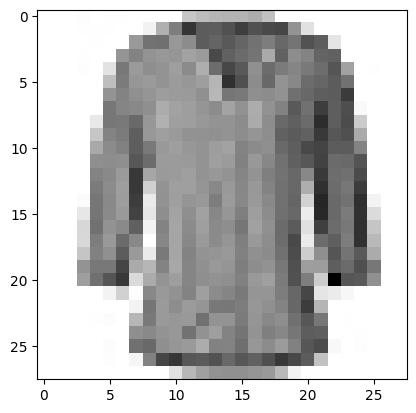

Count[4] / 예측:6(셔츠) | 정답:6


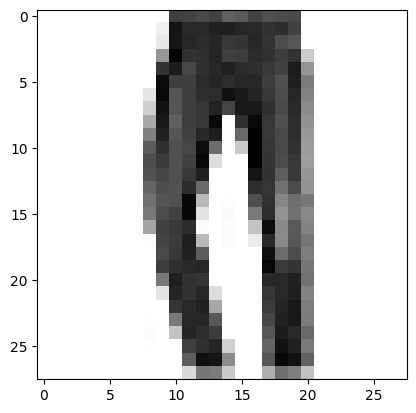

Count[5] / 예측:1(바지) | 정답:1


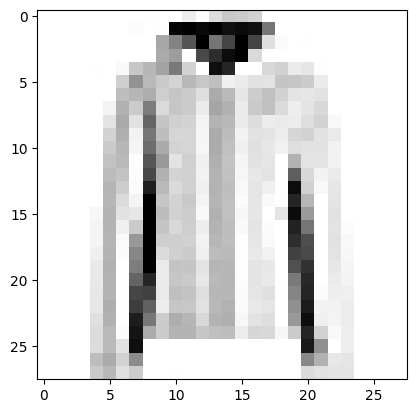

Count[6] / 예측:4(코트) | 정답:4


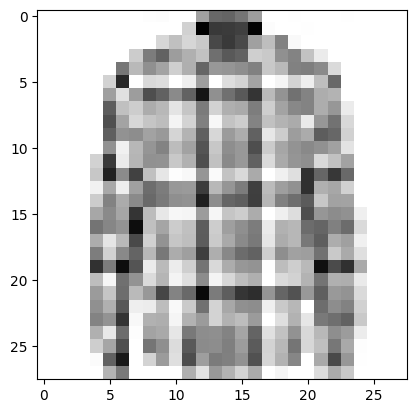

Count[7] / 예측:6(셔츠) | 정답:6


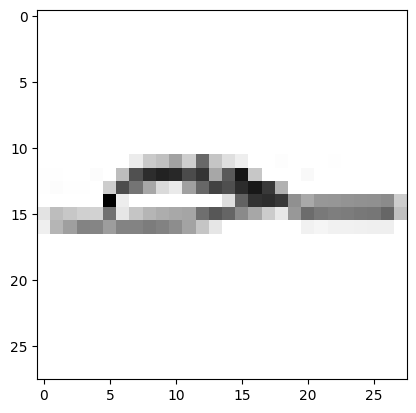

Count[8] / 예측:5( 샌달) | 정답:5


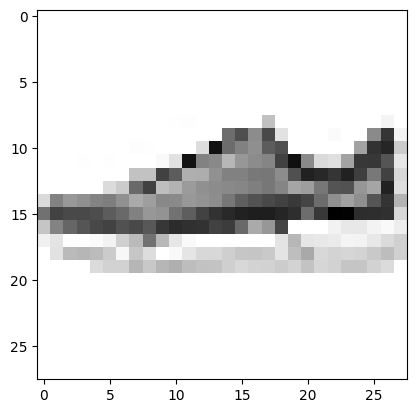

Count[9] / 예측:7(스니커즈) | 정답:7
정답 건수 =  3  / 오답 건수 =  7
정확도= 0.0003  / 오차율= 0.0007


In [56]:
# 확인을 위한 프로그램

# 정답/오답 확인변수
o = 0
x = 0

# for i in range(len(test_preds)) :
for i in range(10) :
    # 정답/오답 확인하기
    if np.argmax(test_preds[i] == test_target[i]) :
        o = o + 1
    else :
        x = x + 1
    
    # test 데이터 이미지 확인하기
    plt.imshow(test_scaled[i].reshape(28, 28), cmap="gray_r")
    plt.show()
    
    # 예측값과 target값 비교
    print("Count[{}] / 예측:{}({}) | 정답:{}".format(i,
                                    np.argmax(test_preds[i]),
                                    classes[np.argmax(test_preds[i])],
                                    test_target[i]))
    
## 정답 및 오답 확인
print("정답 건수 = ", o, " / 오답 건수 = ", x)
print("정확도=", o/len(test_preds), " / 오차율=", x/len(test_preds))